# Generalized Linear Models (GLM)

## Task
Fit and interpret several types of GLMs (e.g., Poisson regression for count data).

## Objective
Understand the extensions of linear models to distributions other than the normal distribution.

## Implementation
Here, we use a Poisson regression as an example to demonstrate GLM. We will simulate some data that follows a Poisson distribution and use GLM to model it.


In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'x': np.random.normal(size=100),
    'y': np.random.poisson(lam=2, size=100)
})

# Fitting a Poisson regression model
model = smf.glm('y ~ x', data=data, family=sm.families.Poisson()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -172.26
Date:                Tue, 22 Oct 2024   Deviance:                       128.93
Time:                        00:52:50   Pearson chi2:                     110.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007226
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6523      0.072      9.002      0.0

## Robust Regression

## Task
Apply robust regression techniques to datasets with outliers.

## Objective
Learn methods like RANSAC and Theil-Sen estimators that are less sensitive to outliers.

## Implementation
We apply the RANSAC regression method to a dataset with artificially added outliers.


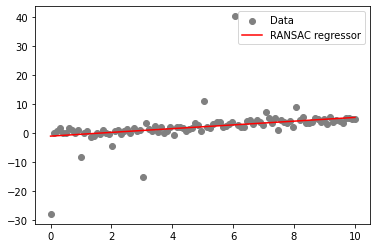

In [2]:

from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

# Generating synthetic data with outliers
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 0.5 * x + np.random.normal(size=x.size)
y[::10] += 20 * np.random.normal(size=y[::10].size)

# Applying RANSAC
ransac = RANSACRegressor().fit(x.reshape(-1, 1), y)

# Plotting
plt.scatter(x, y, color='grey', marker='o', label='Data')
plt.plot(x, ransac.predict(x.reshape(-1, 1)), color='red', label='RANSAC regressor')
plt.legend()
plt.show()


## Mixed Effects Models

## Task
Analyze data that includes both fixed and random effects using linear mixed models.

## Objective
Handle hierarchical or grouped data effectively, essential for complex data structures like nested datasets.

## Implementation
We analyze a dataset with fixed and random effects using a linear mixed model.


In [3]:

import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Generating synthetic data
group = np.repeat(np.arange(1, 5), 25)
subgroup = np.tile(np.repeat([1, 2], 25), 2)[:100]
measure = np.random.normal(0, 1, 100) + np.repeat([0, 1, 2, 3], 25)

data = pd.DataFrame({'Group': group, 'Subgroup': subgroup, 'Measure': measure})

# Defining and fitting a mixed effects model
model = MixedLM.from_formula('Measure ~ 1', groups='Group', re_formula='~Subgroup', data=data)
result = model.fit()
print(result.summary())


              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Measure  
No. Observations:      100        Method:                REML     
No. Groups:            4          Scale:                 1.4001   
Min. group size:       25         Log-Likelihood:        -164.7144
Max. group size:       25         Converged:             Yes      
Mean group size:       25.0                                       
------------------------------------------------------------------
                     Coef.    Std.Err.     z   P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept             1.713        0.805 2.126 0.033  0.134  3.292
Group Var             2.938 25344855.164                          
Group x Subgroup Cov -0.409 19008641.373                          
Subgroup Var          0.057 12672427.582                          



c:\Users\91771\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\91771\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
